In [ ]:
#The Capomulnin treatment significantly decreased tumor volume of mouse x401
#There is an almost perfect positive correlation present between weight and Tumor Volume
#Capomulin and Ramicane seem to be more effective at decreasing tumor size than Infubinol and Ceftamin

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "matplotlib/data/Mouse_metadata.csv"
study_results_path = "matplotlib/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
overall_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
overall_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
overall_data["Mouse ID"].value_counts().head()

g989    13
j989    10
t565    10
o331    10
f545    10
Name: Mouse ID, dtype: int64

In [17]:
mice_data = overall_data.set_index("Mouse ID")
mouse = mice_data.loc["g989", :]
mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [18]:
cleaned_data = mice_data.drop("g989")
clean_data = cleaned_data.reset_index()
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
stats_df = clean_data.groupby("Drug Regimen")
Mean = stats_df["Tumor Volume (mm3)"].mean()
Median = stats_df["Tumor Volume (mm3)"].median()
Var = stats_df["Tumor Volume (mm3)"].var()
Std = stats_df["Tumor Volume (mm3)"].std()
SEM = stats_df["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean": Mean,
                              "Median": Median, 
                              "Variance": Var,
                              "Standard Deviation": Std,
                              "SEM": SEM})
summary_stats_df 

,Mean,Median,SEM,Standard Deviation,Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,52.320930,50.446266,0.544332,6.622085,43.852013
Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562


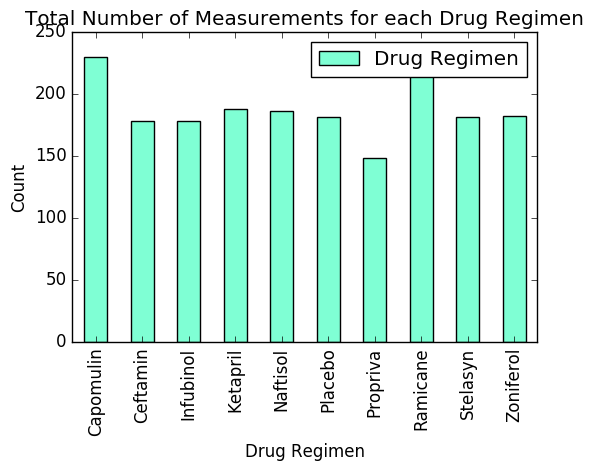

In [53]:
treatment = clean_data.groupby("Drug Regimen")
treatment_count = pd.DataFrame(treatment["Drug Regimen"].count())
bar_chart = treatment_count.plot(kind = "bar", color = "aquamarine", title = "Total Number of Measurements for each Drug Regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Count")
plt.show()

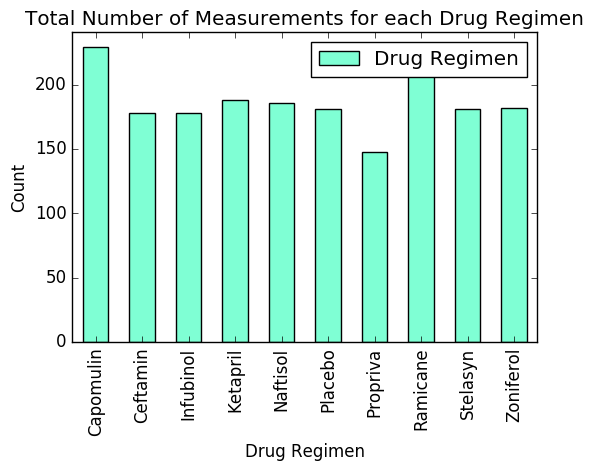

In [52]:
x_axis = np.arange(len(treatment_count))
tick_loc = [i for i in x_axis]
#plt.figure(figsize=(9,8))
plt.bar(x_axis, treatment_count["Drug Regimen"], color = "aquamarine", align = "center", width = 0.55)
plt.xticks(tick_loc, list(treatment_count.index), rotation="vertical")
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(treatment_count["Drug Regimen"])*1.05)
plt.title("Total Number of Measurements for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
column_name = ["Drug Regimen"]
plt.legend(column_name, loc = "best")
plt.show()

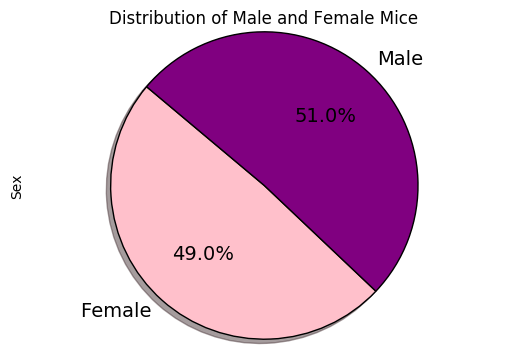

In [46]:
gender = clean_data.groupby("Sex")
gender_count = pd.DataFrame(gender["Sex"].count())
gender_count.plot(kind = "pie", y = "Sex",\
                          title = "Distribution of Male and Female Mice", startangle = 140,\
                          autopct = "%1.1f%%", shadow = True, fontsize = 14, colors = ["pink", "purple"], legend = False)
plt.axis("equal")
plt.show()

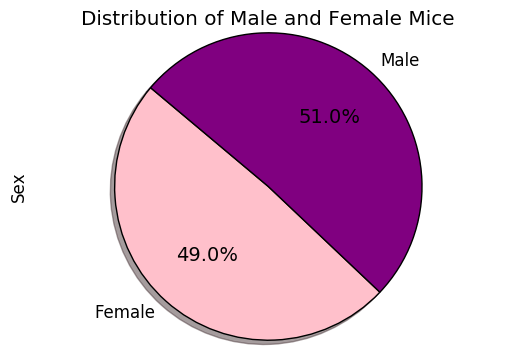

In [48]:
gender2 = list(gender_count.index.values)
gender2_count = gender_count['Sex']
#colors = ["pink", "purple"]
plt.pie(gender2_count, labels = gender2, colors = ["pink", "purple"], autopct = "%1.1f%%", shadow = True, startangle=140)
plt.rcParams["font.size"] = 12
plt.title("Distribution of Male and Female Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

In [86]:
max_timepoint_df = pd.DataFrame(overall_data.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "max_timepoint"})

# Merge max timepoint onto data_df
combo_df = pd.merge(overall_data, max_timepoint_df, on = "Mouse ID")
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimens = []
for i in regimen_list:
    new_df = combo_df.loc[overall_data["Drug Regimen"] == i]
    tumor_volume = new_df.loc[new_df["Timepoint"] == new_df["max_timepoint"]]
    values = tumor_volume["Tumor Volume (mm3)"]
    regimens.append(values)
    quartiles = values.quantile([.25,.5,.75])
    firstq = quartiles[0.25]
    thirdq = quartiles[0.75]
    iqr = thirdq - firstq
    upper_limit = firstq + (1.5*iqr)
    lower_limit = thirdq - (1.5*iqr)
    outliers = (values.loc[(tumor_volume["Tumor Volume (mm3)"] >= upper_limit) | 
                                        (tumor_volume["Tumor Volume (mm3)"] <= lower_limit)]).count()
    print("Number of outliers for "+ str(i) + ": " + str(outliers))
    print("IQR for " + str(i) + ": " + str(iqr))
    print("Upper Limit for " + str(i) + ": " + str(upper_limit))
    print("Lower Limit for " + str(i) + ": " + str(lower_limit))
    print("----------------------------------")

Number of outliers for Capomulin: 5
IQR for Capomulin: 7.78186346
Upper Limit for Capomulin: 44.05015203
Lower Limit for Capomulin: 28.48642511
----------------------------------
Number of outliers for Ramicane: 2
IQR for Ramicane: 9.09853672
Upper Limit for Ramicane: 45.20827463
Lower Limit for Ramicane: 27.01120119
----------------------------------
Number of outliers for Infubinol: 5
IQR for Infubinol: 11.47713516
Upper Limit for Infubinol: 71.26431043
Lower Limit for Infubinol: 48.31004011
----------------------------------
Number of outliers for Ceftamin: 0
IQR for Ceftamin: 15.57775218
Upper Limit for Ceftamin: 72.08870612
Lower Limit for Ceftamin: 40.93320176
----------------------------------


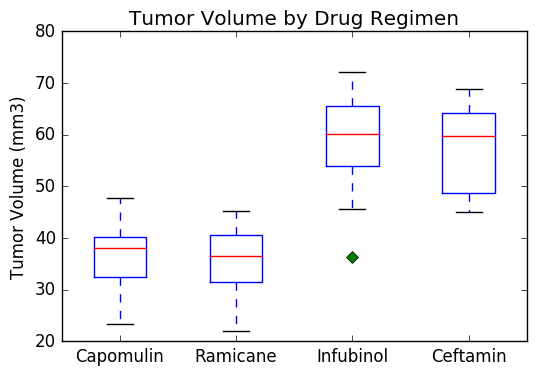

In [88]:
flierprops = dict(markerfacecolor = "green", marker = "D", markersize = 6, markeredgecolor = "black")
plt.boxplot(regimens, flierprops = flierprops)
plt.title("Tumor Volume by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

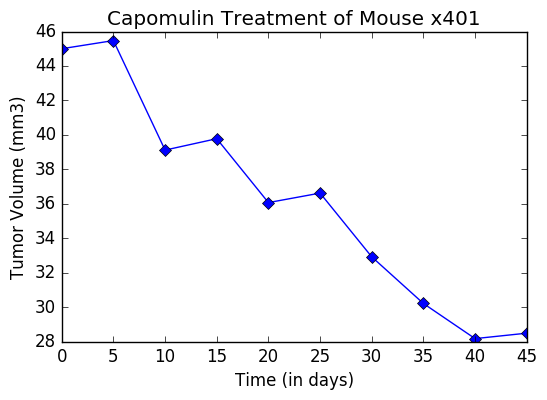

In [89]:
mouse = overall_data.loc[overall_data["Mouse ID"] == "x401"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker = "D")
plt.xlabel("Time (in days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")
plt.show()

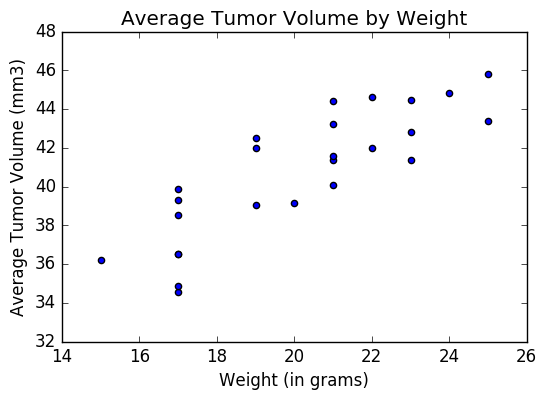

In [91]:
capomulin_data = overall_data.loc[overall_data["Drug Regimen"] == "Capomulin"]
avg_tum_vol = pd.DataFrame(capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})
avg_tum_vol = pd.merge(capomulin_data, avg_tum_vol, on='Mouse ID')
final_avg_tum_vol = avg_tum_vol[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
x = final_avg_tum_vol["Weight (g)"]
y = final_avg_tum_vol["avg_tumor_vol"]
plt.scatter(x, y)
plt.xlabel("Weight (in grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()

The correlation coefficient is 0.84
The linear regression line equation is y = 0.95x + 21.55


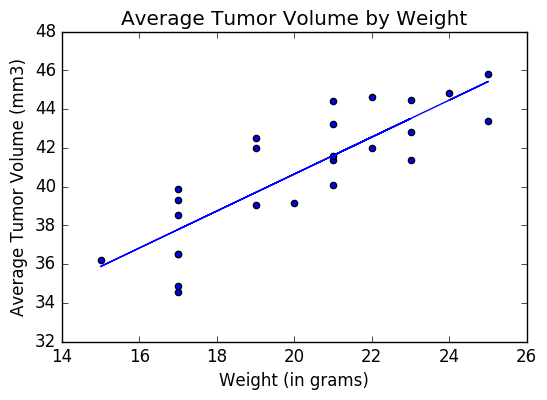

In [102]:
capomulin_data = overall_data.loc[overall_data["Drug Regimen"] == "Capomulin"]
avg_tum_vol = pd.DataFrame(capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "avg_tumor_vol"})
avg_tum_vol = pd.merge(capomulin_data, avg_tum_vol, on='Mouse ID')
final_avg_tum_vol = avg_tum_vol[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
x = final_avg_tum_vol["Weight (g)"]
y = final_avg_tum_vol["avg_tumor_vol"]
plt.scatter(x, y)
plt.xlabel("Weight (in grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
correlation = st.pearsonr(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlation[0],2)))
print("The linear regression line equation is " + line_eq)
plt.show()